In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style('whitegrid')


In [2]:
## Path
file = './Data/Small_Data/online_orders.json'

In [22]:
## Carregar Arquivo (customer_id e visitor_id como string para evitar notação cientifica)
df = pd.read_json(file, lines=True, dtype={'visitor_id':str,'customer_id': str})

# 1.0 - Exploratory Data Analysis | Análise Exploratória de Dados

In [23]:
df.head(10)

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
0,2018-08-01,3663323563643832383039356,desktop,363063373630306,323762666337343,1,839,None
1,2018-08-01,3430316531623964316332613,mobile,356664366366353,313562333039323,1,629,63393337303931353431
2,2018-08-01,3261343261306231336437393,desktop,313432656633333,383863346531623,1,219,37653631373639353439
3,2018-08-01,6437386532653732323563656,mobile,633236633438383,666136386663626,1,239,65333830303066373165
4,2018-08-01,6264656662326430346661616,desktop,623030326130383,626533383465323,1,69,None
5,2018-08-01,6638653965656263613238623,desktop,343136663661646,366464333539333,1,298,None
6,2018-08-01,6438323963376433356532633,desktop,353131646163336,373163626265643,1,598,None
7,2018-08-02,3933383761663335353034373,mobile,636536353265386,356466373137383,1,1798,61306161303630373135
8,2018-08-02,6363363338623337663538353,mobile,363037313438636,383530353262626,1,428,62633265623261666566
9,2018-08-02,3761306638666637343734393,desktop,343238636534646,303936663162613,1,298,35623131306438343161


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12237 entries, 0 to 12236
Data columns (total 8 columns):
date             12237 non-null datetime64[ns]
visitor_id       12237 non-null object
deviceType       12237 non-null object
order_id         12237 non-null int64
on_product_id    12237 non-null int64
quantity         12237 non-null int64
price            12237 non-null int64
customer_id      7757 non-null object
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 764.9+ KB


In [46]:
df.customer_id.replace('None', np.nan, inplace=True)
df.visitor_id.replace('None', np.nan, inplace=True)

In [47]:
print('Dia Inicial:',df.date.min())
print('Dia Final:',df.date.max())

Dia Inicial: 2018-08-01 00:00:00
Dia Final: 2018-08-31 00:00:00


Periodo de coleta = Periodo offline (ok)

In [48]:
## Acessos
df.deviceType.value_counts()

mobile     6971
desktop    5266
Name: deviceType, dtype: int64

**Acesso Mobile > Acesso Desktop**

In [57]:
df[df.price==df.price.max()]

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
596,2018-08-15,3964346363373032643564653,mobile,353034336533306,633263646431626,1,11190,34366334393234303934
1854,2018-08-21,3731333664356630383162346,mobile,653465353366643,373236323565303,1,11190,35363233663665383639
8461,2018-08-15,3838383135656264386463313,desktop,346632663531363,373236323565303,1,11190,NaN
10814,2018-08-15,6336383764623038333638396,mobile,623864623164616,633263646431626,1,11190,61373536353465303639


### Que produto é esse que um item tem preço de 11190?

In [62]:
df.quantity.value_counts()

1    12209
2       26
3        2
Name: quantity, dtype: int64

# 2.0 - Preparation | Preparação

## 2.1 Data Cleaning - NaN | Limpeza de Dados - NaN

In [73]:
df.isnull().sum()

date                0
visitor_id          0
deviceType          0
order_id            0
on_product_id       0
quantity            0
price               0
customer_id      4480
dtype: int64

In [77]:
len(df.customer_id)

12237

**4480 NaN no customer_id column, pq existem compras online sem identificação de user?**  
**36% do costumer_id está vazio (valor alto)** 

In [79]:
## Drop valores null
no_null = df.copy()
no_null.dropna(axis=0, inplace=True)
no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7757 entries, 1 to 12236
Data columns (total 8 columns):
date             7757 non-null datetime64[ns]
visitor_id       7757 non-null object
deviceType       7757 non-null object
order_id         7757 non-null int64
on_product_id    7757 non-null int64
quantity         7757 non-null int64
price            7757 non-null int64
customer_id      7757 non-null object
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 545.4+ KB


In [85]:
## Reorganiza indices
no_null = no_null.reset_index().drop(columns=['index'])
no_null.head()

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
0,2018-08-01,3430316531623964316332613,mobile,356664366366353,313562333039323,1,629,63393337303931353431
1,2018-08-01,3261343261306231336437393,desktop,313432656633333,383863346531623,1,219,37653631373639353439
2,2018-08-01,6437386532653732323563656,mobile,633236633438383,666136386663626,1,239,65333830303066373165
3,2018-08-02,3933383761663335353034373,mobile,636536353265386,356466373137383,1,1798,61306161303630373135
4,2018-08-02,6363363338623337663538353,mobile,363037313438636,383530353262626,1,428,62633265623261666566


## 2.2 Data Cleaning - Outliers | Limpeza de Dados - Outliers

In [90]:
df.price.describe()

count    12237.000000
mean       461.047397
std        481.098790
min         19.000000
25%        209.000000
50%        359.000000
75%        569.000000
max      11190.000000
Name: price, dtype: float64

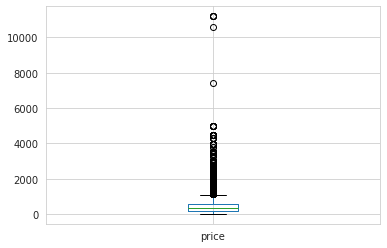

In [92]:
df.price.plot(kind='box')

**Mediana representa melhor que média**

In [96]:
df[df.price>5000]

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
596,2018-08-15,3964346363373032643564653,mobile,353034336533306,633263646431626,1,11190,34366334393234303934
1016,2018-08-16,3863393432663064653564393,mobile,643934386339343,656161613963633,1,7399,32383332626361303562
1854,2018-08-21,3731333664356630383162346,mobile,653465353366643,373236323565303,1,11190,35363233663665383639
8461,2018-08-15,3838383135656264386463313,desktop,346632663531363,373236323565303,1,11190,NaN
10814,2018-08-15,6336383764623038333638396,mobile,623864623164616,633263646431626,1,11190,61373536353465303639
11576,2018-08-15,6230376437366531633061373,mobile,373131333539306,616637363432393,1,10590,NaN


## 2.3 Data Cleaning - Duplicated | Limpeza de Dados - Duplicados 

In [98]:
df.duplicated().sum()

0

**Não existem linhas completamente duplicadas e a duplicidade de valores individuais não são problema**

# 3.0 - Análises

In [100]:
df.head()

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
0,2018-08-01,3663323563643832383039356,desktop,363063373630306,323762666337343,1,839,NaN
1,2018-08-01,3430316531623964316332613,mobile,356664366366353,313562333039323,1,629,63393337303931353431
2,2018-08-01,3261343261306231336437393,desktop,313432656633333,383863346531623,1,219,37653631373639353439
3,2018-08-01,6437386532653732323563656,mobile,633236633438383,666136386663626,1,239,65333830303066373165
4,2018-08-01,6264656662326430346661616,desktop,623030326130383,626533383465323,1,69,NaN
